In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df = df.drop('Serial No.', axis=1)
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


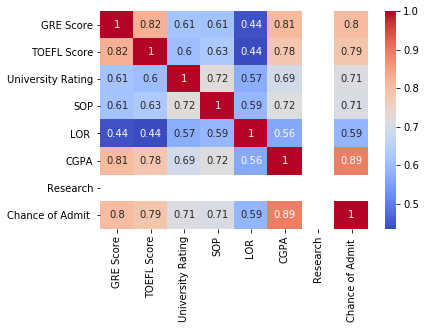

In [23]:
sns.heatmap(df[df['Research'] == 1].corr(), cmap='coolwarm', annot=True)

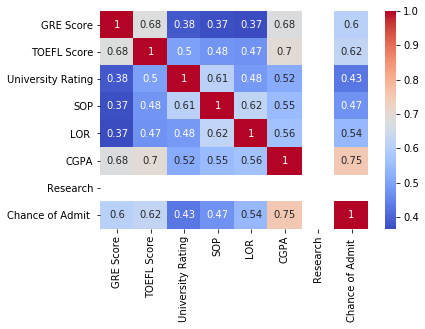

In [22]:
sns.heatmap(df[df['Research'] == 0].corr(), cmap='coolwarm', annot=True)

In [24]:
data = df[df['Research'] == 0]
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
4,314,103,2,2.0,3.0,8.21,0,0.65
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
15,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...
487,327,115,4,3.5,4.0,9.14,0,0.79
489,302,110,3,4.0,4.5,8.50,0,0.65
491,297,99,4,3.0,3.5,7.81,0,0.54
498,312,103,4,4.0,5.0,8.43,0,0.73


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 4 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          220 non-null    int64  
 1   TOEFL Score        220 non-null    int64  
 2   University Rating  220 non-null    int64  
 3   SOP                220 non-null    float64
 4   LOR                220 non-null    float64
 5   CGPA               220 non-null    float64
 6   Research           220 non-null    int64  
 7   Chance of Admit    220 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 15.5 KB


In [39]:
TOEFL = data['TOEFL Score']
CGPA = data['CGPA']
A = np.column_stack((np.ones(220), TOEFL, CGPA))

In [40]:
y = data[['Chance of Admit ']]

In [41]:
# вычислим OLS оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
w_hat

,Chance of Admit
0,-1.044864
1,0.004427
2,0.148077


In [43]:
-1.045 + 0.004*107 + 0.148*9.1

0.7297999999999998

In [44]:
# Стандартизация

In [50]:
# Найдем средние значения
TOEFL_mean = TOEFL.mean()
CGPA_mean = CGPA.mean()
y_mean = y.mean()

In [51]:
# Центрируем
TOEFL_c = TOEFL - TOEFL_mean
CGPA_c = CGPA - CGPA_mean
y_c = y - y_mean

In [54]:
print(f'среднее арифметическое вектора TOEFL после центрирования: {TOEFL_c.mean():.2f}')

среднее арифметическое вектора TOEFL после центрирования: 0.00


In [55]:
# вычисляем длины векторов для нормирования
TOEFL_c_norm = np.linalg.norm(TOEFL_c)
CGPA_c_norm = np.linalg.norm(CGPA_c)
y_c_norm = np.linalg.norm(y_c)
print(f'norm of TOEFL: {TOEFL_c_norm:.2f}')

norm of TOEFL: 71.25


In [58]:
# Нормирование: делим каждый центрированный вектор на его длину
TOEFL_st=TOEFL_c / TOEFL_c_norm
CGPA_st=CGPA_c / CGPA_c_norm
y_st=y_c / y_c_norm
print(f'TOEFL до центрирования:\n{TOEFL.head(4)}')
print('------------------------------')
print(f'TOEFL после центрирования:\n{TOEFL_c.head(4)}')
print('------------------------------')
print(f'TOEFL после нормирования:\n{TOEFL_st.head(4)}')

TOEFL до центрирования:
4    103
7    101
8    102
9    108
Name: TOEFL Score, dtype: int64
------------------------------
TOEFL после центрирования:
4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64
------------------------------
TOEFL после нормирования:
4   -0.013908
7   -0.041980
8   -0.027944
9    0.056271
Name: TOEFL Score, dtype: float64


In [60]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( TOEFL_st, CGPA_st,))

In [61]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[0.19044768],
       [0.62001517]])